### Key Differences Between Decision Trees, Random Forest, and AdaBoost

#### Tree Depth and Structure
- **Decision Trees (DT)**: Individual trees are typically deep with maximum depth ranging from 8 to 30 levels, allowing complex decision boundaries
- **Random Forest (RF)**: Uses full-depth trees similar to standard decision trees
- **AdaBoost**: Employs shallow decision trees (usually max_depth=1) called "decision stumps", which are simple one-level decision trees

#### Model Weighting and Sequential Learning
- **Decision Trees**: Single tree with uniform importance across all nodes
- **Random Forest**: 
  - All trees have equal weights in the final prediction
  - Trees are built independently of each other
- **AdaBoost**:
  - Decision stumps have different weights based on their performance
  - Models are built sequentially where each new model focuses on correcting mistakes of previous models
  - Weight of each stump is determined by its accuracy on the training data

#### Training Data Usage
- **Decision Trees**: Uses complete training dataset
- **Random Forest**:
  - Each tree is trained on a different bootstrap sample of the training data
  - Implements random feature selection at each split
- **AdaBoost**:
  - All models use the complete training dataset
  - Adjusts sample weights after each iteration to focus more on misclassified samples

In [ ]:
# Forming and Splitting the Dataset
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(
    n_samples=1000,
    shuffle=True,
    noise=0.1,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

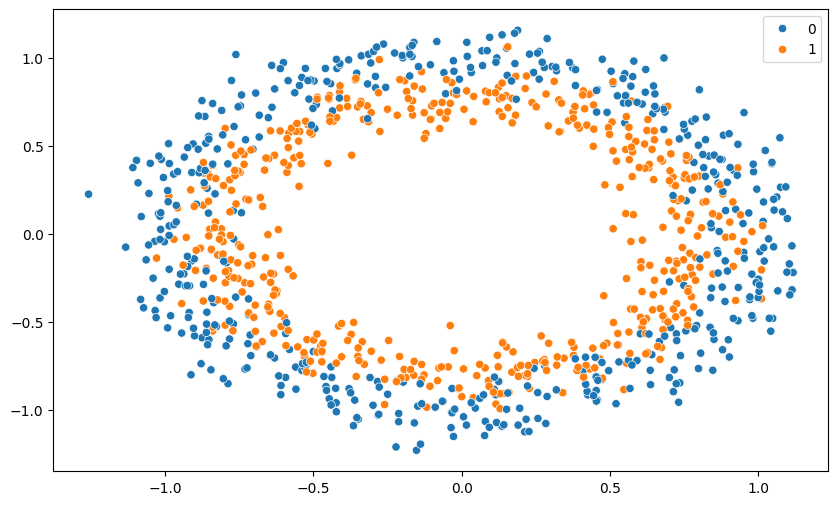

In [ ]:
# Visualizing the dataset
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[10, 6])
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

In [ ]:
# Building and Training the model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=3,
        max_features=0.75,
        random_state=42
    ),
    n_estimators=500,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,500
,learning_rate,0.1
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [ ]:
# Evaluating the model
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       129
           1       0.71      0.79      0.75       121

    accuracy                           0.74       250
   macro avg       0.75      0.75      0.74       250
weighted avg       0.75      0.74      0.74       250



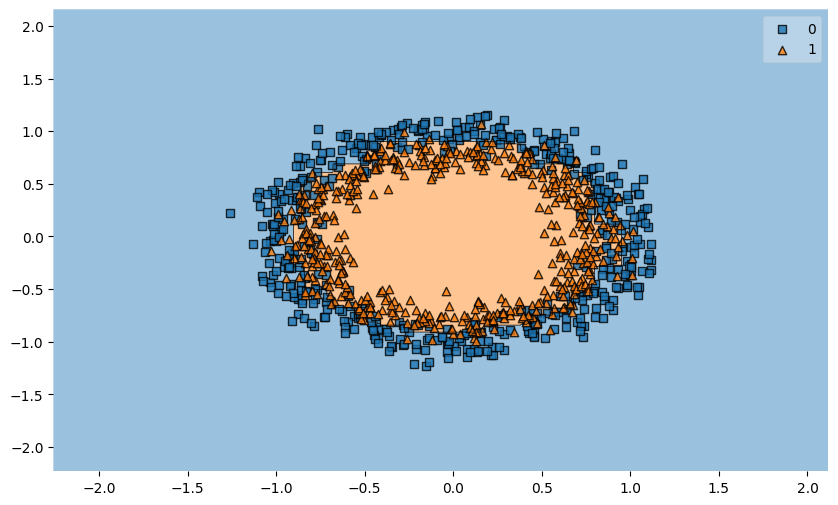

In [ ]:
# Decision Boundry
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10, 6))
plot_decision_regions(
    X, y, model
)
plt.show()